In [1]:
import pandas as pd
import os
import numpy as np
import statsmodels.api as sm
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()
current_folder = cwd.split('\\')[-1]
print(current_folder)
if current_folder != 'BFOR-516-Project':
    os.chdir('..')
    cwd = os.getcwd()
current_folder = cwd.split('\\')[-1]
print(current_folder)
cwd

models
BFOR-516-Project


'C:\\Users\\jacks\\Documents\\GitHub\\BFOR-516-Project'

In [3]:
data = pd.read_csv('data/datafm20.csv')

Take the top 25%, 15%, 10%, 5%, or 1% of CA

1. See if we can predict if a  player is in that top percentile 
2. See if we can predict that a player that is not in the top percentile for CA but does have a PA above so has the potential to join that top percentile

In [4]:
data['CA'].quantile(.99)

133.0

In [5]:
data['PA'].quantile(.75)

111.0

In [6]:
data['log_wage'] = np.log(data['Wage']+1)
data['log_value'] = np.log(data['Value']+1)
data = pd.concat([data, pd.get_dummies(data['Nation'])], axis=1)
data = pd.concat([data, pd.get_dummies(data['Preferred Foot'])], axis=1)
data = pd.concat([data, pd.get_dummies(data['Best Pos'])], axis=1)
data = pd.concat([data, pd.get_dummies(data['Best Role'])], axis=1)

Top 10 leagues Primera División, Brasileirão, Süper Lig, Primeira Liga, Eredivisie, Ligue 1, Serie A, Bundesliga, LaLiga, and English Premier League from https://soccermodo.com/best-soccer-leagues-in-the-world/

In [7]:
top_10_leagues = ['Spanish First Division', 'Italian Serie A', 'Ligue 1 Conforama', 'Bundesliga', 'English Premier Division',
              'Argentine Premier Division', 'Brazilian National First Division', 'Eredivisie', 'Turkish Super League',
              'Portuguese Premier League']

In [8]:
data['top_league'] = np.where(data['Division'].isin(top_10_leagues), 1, 0)

In [9]:
data.loc[data['top_league'] == 1]

,Name,Position,Club,Division,Based,Nation,Height,Weight,Age,Preferred Foot,...,T,TM,Unknown,VOL,W,WB,WM,WP,WTM,top_league
0,Lionel Messi,"AM (RC), ST (C)",Barcelona,Spanish First Division,Spain (First Division),ARG,170,72,32,Left,...,0,0,0,0,0,0,0,0,0,1
1,Cristiano Ronaldo,"AM (RL), ST (C)",Juventus,Italian Serie A,Italy (Serie A),POR,185,83,34,Either,...,0,0,0,0,0,0,0,0,0,1
2,Kylian MbappÃ©,"AM (RL), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,178,73,20,Right,...,0,0,0,0,0,0,0,0,0,1
3,Manuel Neuer,GK,FC Bayern,Bundesliga,Germany (Bundesliga),GER,192,90,33,Either,...,0,0,0,0,0,0,0,0,0,1
4,Neymar,"M (L), AM (LC), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),BRA,175,68,27,Right,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139568,Madu,"AM (R), ST (C)",FamalicÃ£o,Portuguese Premier League,Portugal (Premier League),POR,182,67,16,Left Only,...,0,0,0,0,0,0,0,0,0,1
140030,Riccardo Bellucci,ST (C),Sampdoria,Italian Serie A,Italy (Serie A),ITA,177,64,16,Right Only,...,0,0,0,0,0,0,0,0,0,1
140118,Amadou TraorÃ©,M/AM (C),Sassuolo,Italian Serie A,Italy (Serie A),GUI,173,61,16,Right Only,...,0,0,0,0,0,0,0,0,0,1
140315,Resul Sungur,M (C),Hatayspor,Turkish Super League,Turkey (Super League),TUR,194,83,20,Right Only,...,0,0,0,0,0,0,0,0,0,1


In [10]:
int_list = []
pred_vars = []

for i in data.columns:
    if 'int' in str(data[i].dtypes) or 'float' in str(data[i].dtypes):
        if 'uint' not in str(data[i].dtypes):
            int_list.append(i)
        if i != 'CA' and i !='PA' and i != 'top_league':
            pred_vars.append(i)

In [11]:
corr = data[int_list].corr()
corr.style.background_gradient(cmap='coolwarm')

,Height,Weight,Age,Value,Wage,CA,PA,Wor,Vis,Thr,Tec,Tea,Tck,Str,Sta,TRO,Ref,Pun,Pos,Pen,Pas,Pac,1v1,OtB,Nat,Mar,L Th,Lon,Ldr,Kic,Jum,Hea,Han,Fre,Fla,Fir,Fin,Ecc,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,log_wage,log_value,top_league
Height,1.000000,0.790270,0.048629,0.021120,0.024942,0.076890,0.059560,-0.141420,-0.192301,0.272584,-0.292641,-0.008698,-0.019366,0.360370,-0.105444,0.282027,0.303359,0.279315,0.229945,-0.067279,-0.137968,-0.232315,0.282575,-0.241078,0.017983,0.025868,-0.070726,-0.215612,0.054739,0.288263,0.769151,0.139777,0.303184,-0.074850,-0.236316,-0.297125,-0.178392,0.162173,-0.288349,0.020050,0.084630,-0.298818,-0.240485,0.127001,-0.028173,0.283253,0.290370,0.235186,0.092150,0.089000,-0.243586,0.032998,0.327978,-0.262820,0.035050,0.032722,0.014035
Weight,0.790270,1.000000,0.274063,0.049281,0.058936,0.249639,0.161103,0.008743,-0.063505,0.249706,-0.158673,0.165080,0.051282,0.551687,0.062155,0.233436,0.250476,0.232060,0.326303,0.087870,-0.021370,-0.234372,0.254992,-0.092786,-0.041850,0.106106,0.063888,-0.071271,0.141025,0.248535,0.694555,0.231907,0.249714,0.056031,-0.138915,-0.191685,-0.069524,0.158504,-0.165969,0.053931,0.097234,-0.164049,-0.107743,0.277984,0.138192,0.254347,0.253600,0.348554,0.282753,0.256208,-0.215178,0.073557,0.275978,-0.271931,0.086964,0.058074,-0.021138
Age,0.048629,0.274063,1.000000,0.040546,0.073089,0.296342,0.092173,0.235134,0.173740,0.050242,0.127561,0.330482,0.086274,0.379263,0.315064,0.018469,0.006307,0.019915,0.243485,0.309101,0.156565,-0.145307,0.048038,0.196127,-0.004369,0.123241,0.232615,0.190034,0.303110,0.023570,0.151741,0.156826,0.009398,0.241828,0.145065,0.055901,0.115485,0.057289,0.107136,0.084557,0.012726,0.168790,0.172092,0.340873,0.310602,0.050252,0.033244,0.286951,0.335420,0.350986,-0.064017,0.107875,0.028374,-0.195395,0.027583,-0.090926,-0.135740
Value,0.021120,0.049281,0.040546,1.000000,0.763292,0.326957,0.286218,0.178467,0.177202,0.004797,0.169782,0.208125,0.078166,0.166927,0.177811,-0.003040,-0.005287,-0.008685,0.100763,0.183799,0.176875,0.128165,0.005524,0.154641,0.076975,0.066055,0.104486,0.155860,0.069209,-0.001638,0.082608,0.097222,-0.008642,0.156182,0.136361,0.145076,0.129317,0.008712,0.151187,0.097741,0.105903,0.142231,0.133609,0.188301,0.215416,0.001132,-0.001887,0.163199,0.212499,0.205335,0.130989,0.071993,-0.005238,0.101920,0.270435,0.243476,0.310380
Wage,0.024942,0.058936,0.073089,0.763292,1.000000,0.306466,0.270332,0.161506,0.164798,0.010082,0.158015,0.199219,0.071789,0.164677,0.164583,0.001683,0.000324,-0.004923,0.098836,0.180503,0.165641,0.107111,0.012312,0.142671,0.068988,0.060405,0.105603,0.147875,0.075424,0.002603,0.084804,0.097449,-0.002833,0.153742,0.126871,0.133886,0.121339,0.015235,0.136399,0.092806,0.099960,0.131787,0.127897,0.181935,0.207909,0.007815,0.004356,0.159950,0.206039,0.200642,0.113288,0.066046,0.000205,0.077994,0.282082,0.218056,0.247297
CA,0.076890,0.249639,0.296342,0.326957,0.306466,1.000000,0.859521,0.581409,0.561502,0.073998,0.531869,0.709459,0.298931,0.623386,0.567241,-0.009060,0.001791,-0.012333,0.475408,0.543884,0.601253,0.269658,0.060882,0.492931,0.079361,0.317486,0.479528,0.521084,0.223545,0.030932,0.330086,0.395560,-0.002178,0.560957,0.349731,0.430831,0.379396,0.048916,0.458322,0.184661,0.290213,0.486116,0.524601,0.663173,0.662044,0.045140,0.029239,0.555406,0.723519,0.687894,0.302087,0.140309,0.010254,0.188974,0.574260,0.552499,0.231834
PA,0.059560,0.161103,0.092173,0.286218,0.270332,0.859521,1.000000,0.485905,0.509560,0.067196,0.490375,0.602679,0.264767,0.509762,0.433355,-0.004851,0.006144,-0.009872,0.390118,0.469681,0.552309,0.215659,0.057120,0.414957,0.070558,0.261362,0.398674,0.464093,0.141624,0.032341,0.277155,0.345306,0.002223,0.492098,0.317330,0.401876,0.339272,0.040638,0.413734,0.175693,0.264140,0.424214,0.462811,0.548684,0.555864,0.036999,0.026156,0.488480,0.610402,0.573239,0.241473,0.115911,0.008599,0.150812,0.542212,0.543839,0.304897
Wor,-0.141420,0.008743,0.235134,0.178467,0.161506,0.581409,0.

In [12]:
corr2 = corr[['top_league']]
corr2.style.background_gradient(cmap='coolwarm')

,top_league
Height,0.014035
Weight,-0.021138
Age,-0.135740
Value,0.310380
Wage,0.247297
CA,0.231834
PA,0.304897
Wor,0.113847
Vis,0.127275
Thr,0.023271


In [13]:
len(pred_vars)

333

In [14]:
from sklearn.model_selection import train_test_split

# use index-based sampling since we have time series data
train, test = train_test_split(data, test_size=0.4, shuffle=True)

In [15]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
dtree.fit(train[pred_vars], train['top_league'])

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [16]:
test.loc[test['top_league'] ==1]

,Name,Position,Club,Division,Based,Nation,Height,Weight,Age,Preferred Foot,...,T,TM,Unknown,VOL,W,WB,WM,WP,WTM,top_league
35123,Nicklas Strunck,"DM, M (C)",FC Groningen,Eredivisie,Holland (Eredivisie),DEN,183,69,19,Right Only,...,0,0,0,0,0,0,0,0,0,1
70061,Patricio Luce,D/WB (L),Arsenal de SarandÃ­,Argentine Premier Division,Argentina (Premier Division),ARG,183,78,22,Left Only,...,0,0,0,0,0,0,0,0,0,1
8064,Diego RodrÃ­guez,GK,Ctral. CÃ³rdoba (SdE),Argentine Premier Division,Argentina (Premier Division),ARG,184,80,29,Left Only,...,0,0,0,0,0,0,0,0,0,1
14114,Fabrice N'Sakala,D/WB (L),BeÅiktaÅ,Turkish Super League,Turkey (Super League),COD,178,79,28,Left Only,...,0,0,0,0,0,1,0,0,0,1
19729,Bernardo Folha,M/AM (C),FCP,Portuguese Premier League,Portugal (Premier League),POR,177,68,17,Right Only,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429,GastÃ³n Pereiro,AM (RLC),Cagliari,Italian Serie A,Italy (Serie A),URU,188,76,24,Left,...,0,0,0,0,0,0,0,0,0,1
76884,Vincenzo Ferrara,AM (RC),Arzignano Valchiampo,Italian Serie A,Italy (Serie A),ITA,183,75,25,Right Only,...,0,0,0,0,1,0,0,0,0,1
8838,Emrah BaÅsan,"M (RL), AM (RLC)",Bld. Erzurumspor,Turkish Super League,Turkey (Super League),TUR,178,69,27,Left Only,...,0,0,0,0,0,0,0,0,0,1
39785,Mohamed Achi Bouakline,M (C),FC Nantes,Ligue 1 Conforama,France (Ligue 1 Conforama),MAR,183,69,17,Left,...,0,0,0,0,0,0,0,0,0,1


In [17]:
rf = ensemble.RandomForestClassifier()
rf.fit(train[pred_vars], train['top_league'])

RandomForestClassifier()

In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20))
mlp.fit(train[pred_vars], train['top_league'])

MLPClassifier(hidden_layer_sizes=(20, 20))

In [ ]:
svc = svm.SVC(probability=True)
svc.fit(train[pred_vars], train['top_league'])

In [19]:
nb = GaussianNB()
nb.fit(train[pred_vars], train['top_league'])

GaussianNB()

In [20]:
lr = LogisticRegression()
lr.fit(train[pred_vars], train['top_league'])

LogisticRegression()

In [21]:
# list of our models
fitted = [dtree, rf, mlp, nb, lr] #took svc out

# empty dataframe to store the results
result_table = pd.DataFrame(columns=['classifier_name', 'fpr','tpr','auc', 
                                     'log_loss', 'clf_report'])

for clf in fitted:
    # print the name of the classifier
    print(clf.__class__.__name__)
    
    # get predictions
    yproba = clf.predict_proba(test[pred_vars])
    yclass = clf.predict(test[pred_vars])
    
    # auc information
    fpr, tpr, _ = metrics.roc_curve(test['top_league'],  yproba[:,1])
    auc = metrics.roc_auc_score(test['top_league'], yproba[:,1])
    
    # log loss
    log_loss = metrics.log_loss(test['top_league'], yproba[:,1])
    
    # add some other stats based on confusion matrix
    clf_report = metrics.classification_report(test['top_league'], yclass)
    
    # add the results to the dataframe
    result_table = result_table.append({'classifier_name':clf.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc,
                                        'log_loss': log_loss,
                                        'clf_report': clf_report}, ignore_index=True)

DecisionTreeClassifier
RandomForestClassifier
MLPClassifier
GaussianNB
LogisticRegression


In [22]:
result_table.set_index('classifier_name', inplace=True)
display(result_table)

,fpr,tpr,auc,log_loss,clf_report
classifier_name,,,,,
DecisionTreeClassifier,"[0.0, 0.004010146603499086, 0.0040474502928339...","[0.0, 0.13649090060662622, 0.13929071395240317...",0.909551,0.382283,precision recall f1-score ...
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 1.865184466743761e-05, 1....","[0.0, 0.0004666355576294914, 0.000933271115258...",0.950099,0.140949,precision recall f1-score ...
MLPClassifier,"[0.0, 1.865184466743761e-05, 1.865184466743761...","[0.0, 0.004199720018665422, 0.0051329911339244...",0.858506,0.195248,precision recall f1-score ...
GaussianNB,"[0.0, 0.003487894952810833, 0.0035625023314805...","[0.0, 0.13065795613625758, 0.13159122725151656...",0.732671,0.550368,precision recall f1-score ...
LogisticRegression,"[0.0, 0.0, 0.0, 1.865184466743761e-05, 1.86518...","[0.0, 0.0002333177788147457, 0.012365842277181...",0.846182,0.198255,precision recall f1-score ...


In [23]:
for i in result_table.index:
    print('\n---- statistics for', i, "----\n")
    print(result_table.loc[i, 'clf_report'])
    print("Model log loss:", result_table.loc[i, 'log_loss'])


---- statistics for DecisionTreeClassifier ----

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     53614
           1       0.67      0.52      0.59      4286

    accuracy                           0.95     57900
   macro avg       0.82      0.75      0.78     57900
weighted avg       0.94      0.95      0.94     57900

Model log loss: 0.38228311015739397

---- statistics for RandomForestClassifier ----

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     53614
           1       0.82      0.33      0.47      4286

    accuracy                           0.94     57900
   macro avg       0.88      0.66      0.72     57900
weighted avg       0.94      0.94      0.93     57900

Model log loss: 0.14094914066260927

---- statistics for MLPClassifier ----

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     53614
           1       0.75 

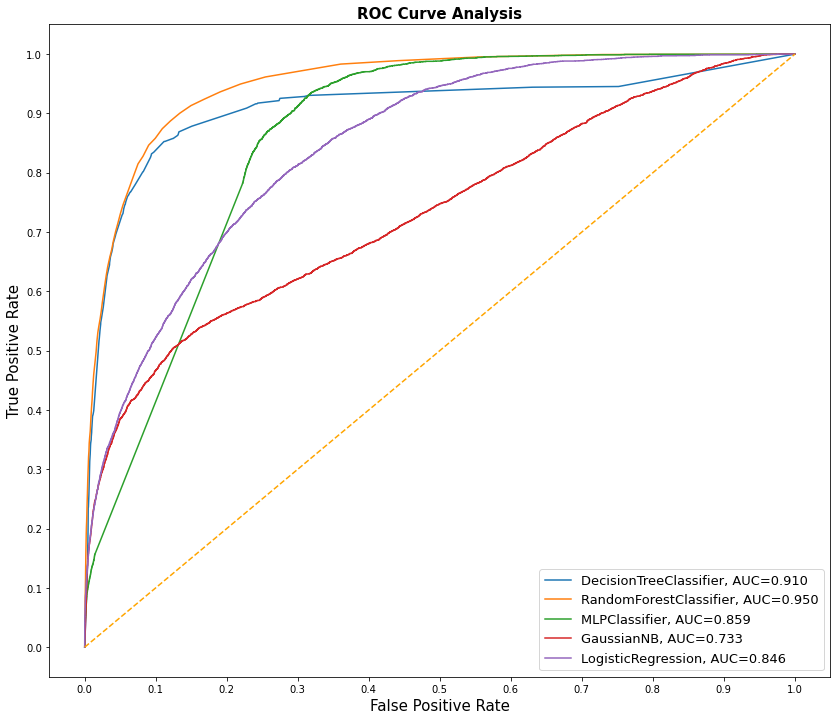

In [24]:
fig = plt.figure(figsize=(14,12))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

DecisionTreeClassifier


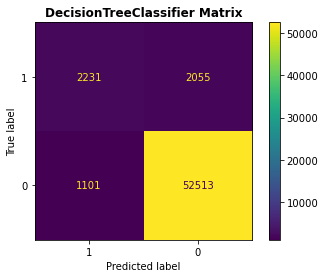

In [25]:
predicted = dtree.predict(test.loc[:, pred_vars])
metrics.confusion_matrix(y_true=test['top_league'], y_pred=predicted, labels=[1, 0])
metrics.plot_confusion_matrix(dtree, test.loc[:, pred_vars], test['top_league'], labels=[1, 0])
plt.title('DecisionTreeClassifier Matrix', fontweight='bold')
print('DecisionTreeClassifier')
plt.show()

RandomForestClassifier


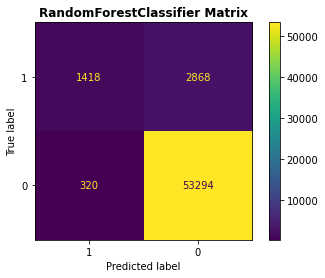

In [26]:
predicted = rf.predict(test.loc[:, pred_vars])
metrics.confusion_matrix(y_true=test['top_league'], y_pred=predicted, labels=[1, 0])
metrics.plot_confusion_matrix(rf, test.loc[:, pred_vars], test['top_league'], labels=[1, 0])
print('RandomForestClassifier')
plt.title('RandomForestClassifier Matrix', fontweight='bold')
plt.show()

MLPClassifier


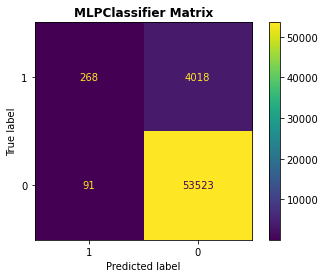

In [27]:
predicted = mlp.predict(test.loc[:, pred_vars])
metrics.confusion_matrix(y_true=test['top_league'], y_pred=predicted, labels=[1, 0])
metrics.plot_confusion_matrix(mlp, test.loc[:, pred_vars], test['top_league'], labels=[1, 0])
plt.title('MLPClassifier Matrix', fontweight='bold')
print('MLPClassifier')
plt.show()

GaussianNB


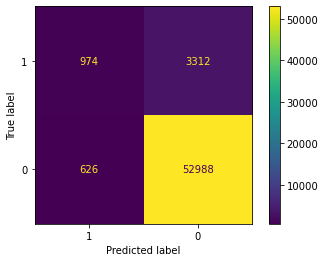

In [28]:
predicted = nb.predict(test.loc[:, pred_vars])
metrics.confusion_matrix(y_true=test['top_league'], y_pred=predicted, labels=[1, 0])
metrics.plot_confusion_matrix(nb, test.loc[:, pred_vars], test['top_league'], labels=[1, 0])
print('GaussianNB')
plt.show()

LogisticRegression


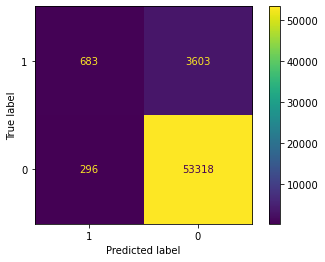

In [29]:
predicted = lr.predict(test.loc[:, pred_vars])
metrics.confusion_matrix(y_true=test['top_league'], y_pred=predicted, labels=[1, 0])
metrics.plot_confusion_matrix(lr, test.loc[:, pred_vars], test['top_league'], labels=[1, 0])
print('LogisticRegression')
plt.show()